<a href="https://colab.research.google.com/github/valesierrai/Introduccion-a-la-Inteligencia-de-Negocios/blob/main/Visualizaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualización**

Usualmente, se realiza una visualización de los datos, en formato tabla o gráfico, previo a el análisis de los mismo; siendo esta una de las primeras etapas de EDA (Análisis Exploratorio de Datos)

##**0. Cargamos Librerias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


##**1. Creamos la Base de Datos**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IB/Transactions.xlsx')
df.head()

###Las **tablas de frecuencias** pueden ser una herramienta básica en los análisis preliminares

In [ ]:
#Realizamos los conteos
frecuencia = df['Repeat'].value_counts()
frecuencia

,count
Repeat,
Yes,140
No,60


In [ ]:
#Frecuencia en proporción, con normalización de datos
frecuencia_prop = df['Repeat'].value_counts(normalize=True)
frecuencia_prop

,proportion
Repeat,
Yes,0.7
No,0.3


In [ ]:
#Construimos la tabla en formato de DataFrame
pd.DataFrame({'Frecuencia': frecuencia,
             'Frecuencia Relativa': frecuencia_prop})

,Frecuencia,Frecuencia Relativa
Repeat,,
Yes,140,0.7
No,60,0.3


*Podemos ver esto de primerazo: Suele ser alta la frecuencia de los clientes que repiten las compras en la tienda.

In [ ]:
#Realizamos los conteos
frecuencia_sex = df['Sex'].value_counts()

#Frecuencia en proporción, con normalización de datos
frecuencia_prop_sex = df['Sex'].value_counts(normalize=True)

La misma información se podría visualizar con un gráfico de barras

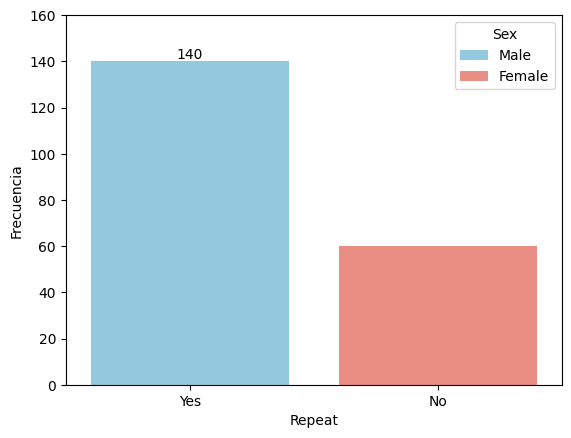

In [ ]:
#Definimos los colores del gráfico (Opcional), en caso de np hacerlo en el formato por defecto

colores = ["skyblue", "salmon"]

#Definimos el gráfico
ax = sns.barplot(x = frecuencia.index, y = frecuencia.values, palette = colores, hue = frecuencia_sex.index, legend = True)

#Fijamos los parámetros de los ejes (Opcional)
ax.set(ylim = (0,160), ylabel = 'Frecuencia')
ax.bar_label(ax.containers[0]);


###Los **histogramas** dan una noción de la forma que tiene la distribución de probabilidad de la variable de interés.

In [ ]:
#numero_bins representa el número de bins (barras) que se usarán en la representación de la distribución de probabilidad

numero_bins = 5

#ancho_bins representa el ancho de cada barra, y de acuerdo a ello se agruparan más o menos con la misma información [(max - min)/bins]
ancho_bins = (df['Income'].max()- df['Income'].min())/numero_bins
ancho_bins

41.8

In [ ]:
#Revisamos el máximo
df['Income'].max()

240

In [ ]:
#Hacemos el vector para los intervalos
intervalos = np.linspace(start = 0, stop = 250, num = 6)

<Axes: >

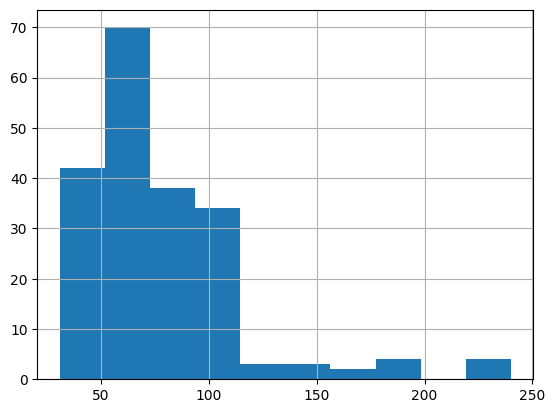

In [ ]:
#Realizamos el gráfico (Forma rápida)
df['Income'].hist()

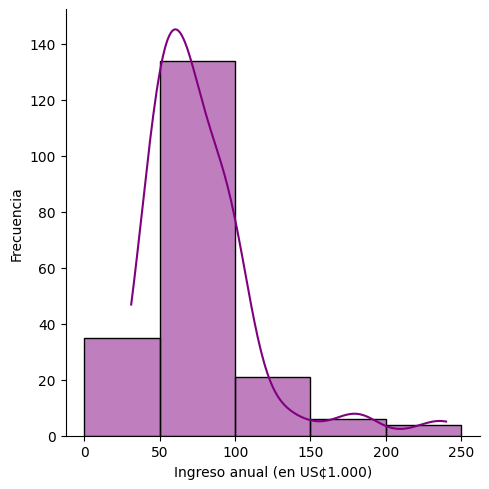

In [ ]:
#Relaizamos el gráfico
ax = sns.displot(df['Income'], bins = intervalos, kde = True, color = "purple")

#Fijamos los parámetros del gráfico
ax.set(xlabel = "Ingreso anual (en US¢1.000)", ylabel = "Frecuencia");

En caso de querer analizar las relaciones entre variables, haremos uso de las tablas de contingencia y los diagramas de barras apilados.

In [ ]:
#Cargamos la tabla
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IB/Promotion.xlsx')
data.tail()

,Email,Purchase,Location
595,596,no,Midwest
596,597,yes,Midwest
597,598,yes,Northeast
598,599,yes,South
599,600,no,South


In [ ]:
#Para la tabla de contingencia, procedemos así
proporciones = pd.crosstab(index = data.Location, columns = data.Purchase,
                           margins = True, normalize = 'all') #margins= suma de las filas y la suma de las columnas
round(proporciones *100, 2)

Purchase,no,yes,All
Location,,,
Midwest,17.83,12.83,30.67
Northeast,6.83,17.00,23.83
South,4.00,21.67,25.67
West,3.00,16.83,19.83
All,31.67,68.33,100.00


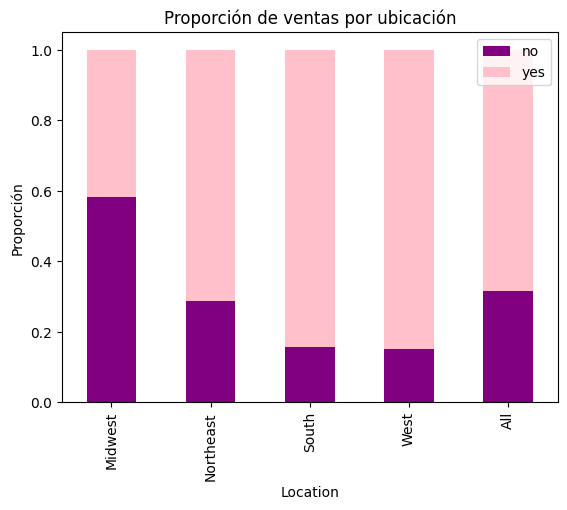

In [ ]:
#En el caso del gráfico

ax = pd.crosstab(index = data.Location, columns = data.Purchase, margins = True, normalize = 'index').plot(kind = 'bar', stacked = True, color = ['purple', 'pink'])

ax.set(ylabel = 'Proporción', title = 'Proporción de ventas por ubicación')
ax.legend();

###Los **diagramas de dispersión** y lo **diagramas de líneas** se usan para relacionar dos variables cuantitativas. Los diagramas de dispersión se utilizan cuando las observaciones no guardan entre sí. Los diagrams de líneas se utilizan cuando las observaciones tienen una secuencia (depende la actual de la anterior). Si el diagram de dispersión maneja burbujas o códigos se pueden relacionar más de 2 variables

In [ ]:
#Cargamos los datos del archivo Birth_Life
birth = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IB/Birth_Life.xlsx')
birth.head()

,Country Name,Life_Exp,Birth_Rate,GNI,Development
0,"Congo, Dem. Rep.",50.002878,45.964,130,Developing
1,India,62.593390,26.463,440,Developing
2,South Africa,56.368317,24.329,3070,Developing
3,China,71.995585,14.030,940,Developing
4,Pakistan,62.758171,32.035,490,Developing


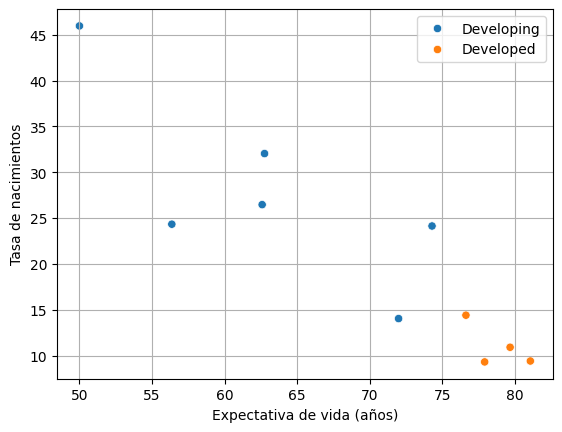

In [ ]:
#Relacionaremos las variables expectativa de vida y tasa de nacimientos mediante un diagrama de dispersión.
#La tercera variable será el desarrollo del país.
ax = sns.scatterplot(x = 'Life_Exp', y = 'Birth_Rate', hue = 'Development',
                     data = birth)
ax.set(xlabel = 'Expectativa de vida (años)', ylabel = 'Tasa de nacimientos')
plt.grid()
ax.legend();

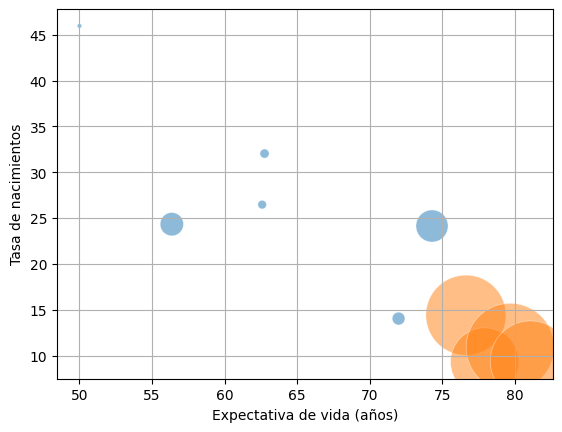

In [ ]:
#El gráfico de burbujas permite hacer visualizaciones similares pero con características adicionales
ax = sns.scatterplot(x = 'Life_Exp', y = 'Birth_Rate', hue = 'Development', size = 'GNI', sizes = (10, 4000),
                     alpha = 0.5, data = birth, legend = False)
plt.grid()
ax.set(xlabel = 'Expectativa de vida (años)', ylabel = 'Tasa de nacimientos');

In [ ]:
birth.sort_values(by = 'GNI', ascending = False).head()

,Country Name,Life_Exp,Birth_Rate,GNI,Development
8,Switzerland,79.680488,10.900,43460,Developed
9,Japan,81.076098,9.400,36230,Developed
6,United States,76.636585,14.400,36070,Developed
7,Germany,77.926829,9.300,26210,Developed
5,Mexico,74.299732,24.132,5810,Developing


###Los **diagramas de calor** son similares a las tablas de contingencia, pero de manera gráfica

In [ ]:
#Leemos los datos de interés y los visualizamos
books = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IB/Bookstores.xlsx')
books.head()

,Record,BookStore,BookType
0,1,Store2,Biography
1,2,Store2,Children book
2,3,Store4,Sci-fi
3,4,Store4,Travel guide
4,5,Store4,Children book


En este caso, observamos la relación entre dos variables cualitativas

In [ ]:
#Como primer paso, realizamos la tabla de contingencia
tabla = pd.crosstab(index = books.BookStore, columns = books.BookType, normalize = 'index', margins = False)
tabla = round(tabla *100, 2)
tabla

BookType,Biography,Children book,Romance,Sci-fi,Self help,Travel guide
BookStore,,,,,,
Store1,17.78,17.78,16.30,18.52,9.63,20.00
Store2,13.04,20.00,25.22,14.78,14.78,12.17
Store3,20.55,15.75,8.90,19.18,15.75,19.86
Store4,17.31,14.42,20.19,20.19,14.42,13.46


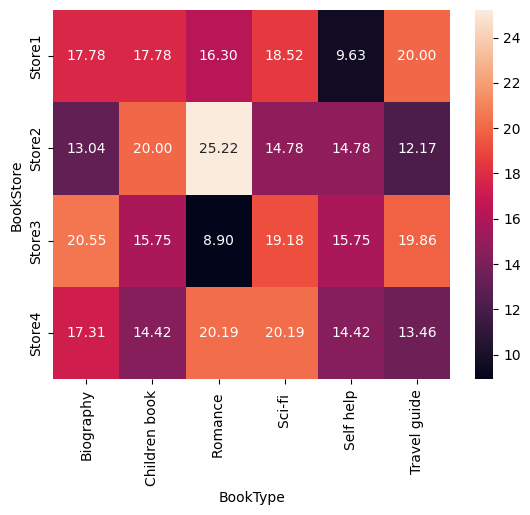

In [ ]:
#Graficamos con el mapa de calor
ax = sns.heatmap(tabla, annot = True, fmt = '.2f')

###Los **diagramas de cajas y bigotes y de violín** nos permiten observar la distribución de los datos con respecto a los cuartiles. Adicionalmente, podemos observar información sobre datos atípicos y distribución de probabilidad (diagrama de violines).

In [ ]:
#Cargamos los datos
autos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IB/imports-85.data', header = None)

#Visualizamos la información
autos.head()

#Ponemos los nombres de las columnas
autos.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'lenght', 'width',
                 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#Saber los posibles valores de la columna 'num-of-doors'
autos['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [ ]:
#Borramos los datos con ?
autos.drop(index = autos[autos['num-of-doors'] == '?'].index, inplace = True)

In [ ]:
#Volvemos a probar el unique
autos['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
#Vamos a cambiar las letras por números, haciendo un mapeo
autos['num-of-doors'] = autos['num-of-doors'].map({'two': 2, 'four': 4})

In [ ]:
autos.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


<ipython-input-66-6abe7bad9d3d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


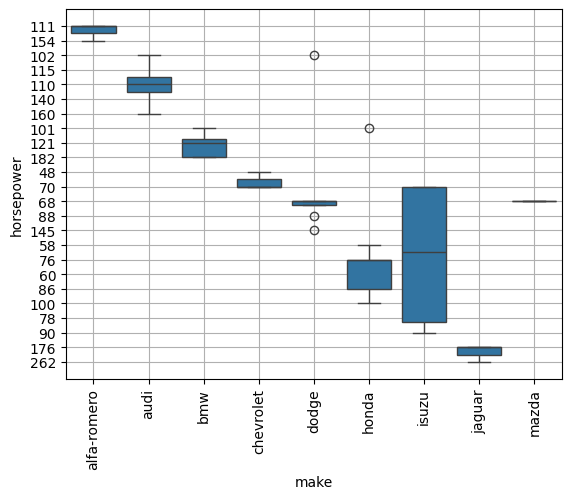

In [ ]:
#Graficamos un diagrama de cajas y bigotes de acuerdo al fabricante y el número de puertas
ax = sns.boxplot(x = 'make', y ='horsepower', data = autos[0:50], );

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.grid()

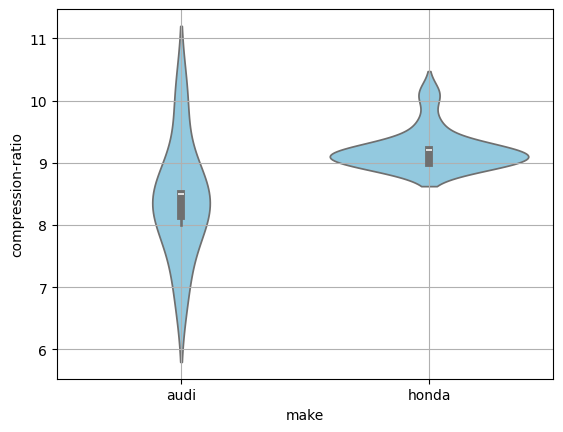

In [ ]:
autos_filtrado = autos[autos['make'].isin (['audi','honda'])]

#Diagrama de Violín
sns.violinplot(data = autos_filtrado[0:20], x = 'make', y = 'compression-ratio', color = 'skyblue')
plt.grid()

*Audi: distribución muy gaussiana, a pesar de tener sesgo
*Honda: distribución mezcla de gaussiana